<a href="https://colab.research.google.com/github/AnushaV01/Risk-Assessment-in-Autonomous-Vehicles-Identifying-and-Evaluating-Risks/blob/main/Sensitivity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

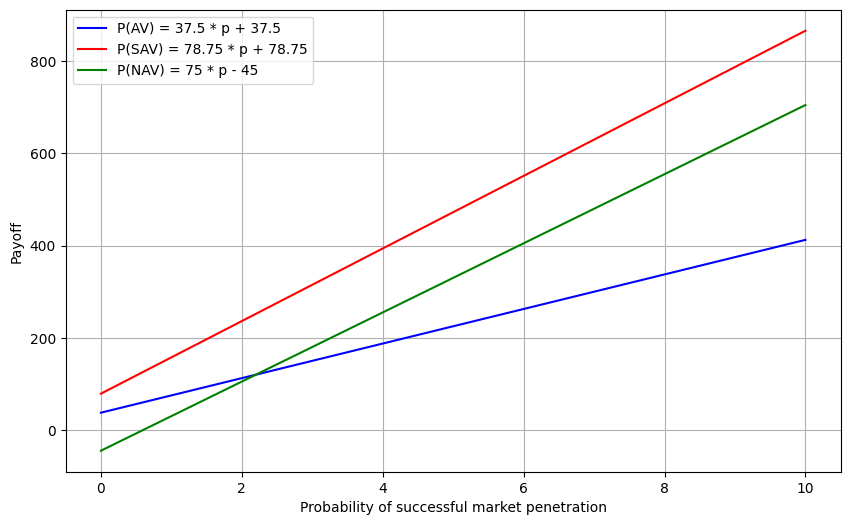

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for x
x = np.linspace(0, 10, 400)

# Calculate y using the equation 3x + 4 = y
y = 37.5 * x + 37.5
y2 = 78.75 * x + 78.75
y3 = 75 * x - 45

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='P(AV) = 37.5 * p + 37.5', color='blue')
plt.plot(x, y2, label='P(SAV) = 78.75 * p + 78.75', color='red')
plt.plot(x, y3, label='P(NAV) = 75 * p - 45', color='green')
plt.title('')
plt.ylabel('Payoff')
plt.xlabel('Probability of successful market penetration')
plt.grid(True)
plt.legend()
plt.show()

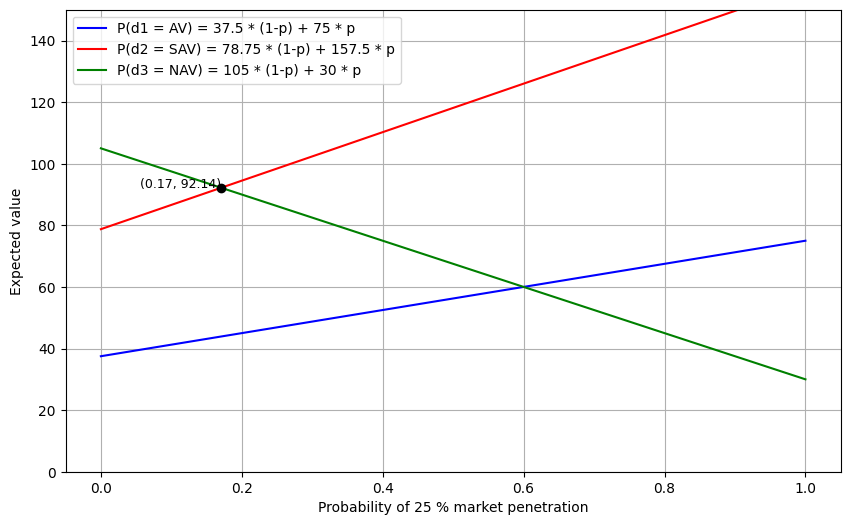

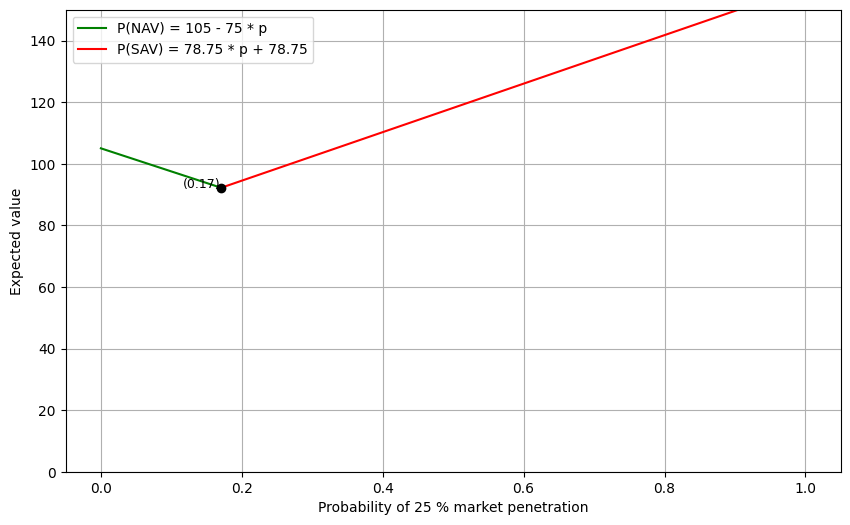

In [ ]:

# Define the range for x
x = np.linspace(0, 1, 400)

# Calculate y using the equation 3x + 4 = y
y = 37.5 * x + 37.5
y2 = 78.75 * x + 78.75
y3 = -75 * x + 105

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='P(d1 = AV) = 37.5 * (1-p) + 75 * p', color='blue')
plt.plot(x, y2, label='P(d2 = SAV) = 78.75 * (1-p) + 157.5 * p', color='red')
plt.plot(x, y3, label='P(d3 = NAV) = 105 * (1-p) + 30 * p', color='green')

x_intersect_y_y2 = 0.170
y_intersect_y_y2 = 78.75 * x_intersect_y_y2 + 78.75
plt.plot(x_intersect_y_y2, y_intersect_y_y2, 'ko')
plt.text(x_intersect_y_y2, y_intersect_y_y2, f'({x_intersect_y_y2:.2f}, {y_intersect_y_y2:.2f})', fontsize=9, ha='right')

plt.ylim(0, 150)
plt.title('')
plt.ylabel('Expected value')
plt.xlabel('Probability of 25 % market penetration')
plt.grid(True)
plt.legend()
plt.show()


x1 = x[x <= x_intersect_y_y2]
x2 = x[x > x_intersect_y_y2]
y4 = 78.75 * x2 + 78.75
y5 = -75 * x1 + 105
plt.figure(figsize=(10, 6))
plt.plot(x1, y5, label='P(NAV) = 105 - 75 * p', color='green')
plt.plot(x2, y4, label='P(SAV) = 78.75 * p + 78.75', color='red')
plt.ylim(0, 150)

plt.plot(x_intersect_y_y2, y_intersect_y_y2, 'ko')
plt.text(x_intersect_y_y2, y_intersect_y_y2, f'({x_intersect_y_y2:.2f})', fontsize=9, ha='right')

plt.title('')
plt.ylabel('Expected value')
plt.xlabel('Probability of 25 % market penetration')
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-30-9369ee4111d9>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_certainity_eq, y_certainity_eq, 'ko', color='red')
<ipython-input-30-9369ee4111d9>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x_expected_value, y_expected_value, 'ko', color='green')


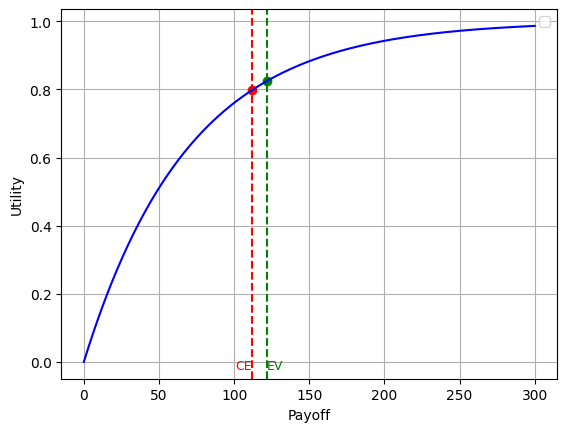

In [ ]:

import math;
# Define the range for x
x = np.linspace(0, 300, 400)

# ----------- PARAMETERES-------------
r = 70;
x_certainity_eq = 112;
x_expected_value = 122;
# -----------------------------------


y_certainity_eq = 1-math.exp(-x_certainity_eq/r);


y_expected_value = 1-math.exp(-x_expected_value/r);

# Calculate y using the equation 3x + 4 = y
y = 1-np.exp(-x/r)

plt.axvline(x=x_certainity_eq, color='red', linestyle='--')
plt.axvline(x=x_expected_value, color='green', linestyle='--')
plt.plot(x_certainity_eq, y_certainity_eq, 'ko', color='red')
plt.plot(x_expected_value, y_expected_value, 'ko', color='green')
plt.plot(x, y, label='', color='blue')

plt.text(x_certainity_eq, -0.02, f'CE', fontsize=9, ha='right', color = 'red')
plt.text(x_expected_value, -0.02, f'EV', fontsize=9, ha='left', color = 'green')

plt.title('')
plt.ylabel('Utility')
plt.xlabel('Payoff')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
!pip install pyAgrum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 13.7 MB/s eta 0:00:00


In [ ]:
from pylab import *
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

In [ ]:
bn=gum.BayesNet('LIDAR System')

id_e=bn.add(gum.LabelizedVariable('e','Electrical Failure ?',['T = 0','F=1']));
id_m=bn.add(gum.LabelizedVariable('m','Mirror Motor Malfunction ?',['T = 0','F=1']));
id_f=bn.add(gum.LabelizedVariable('f','Filter (Optical) damaged ?',['T = 0','F=1']));
id_l=bn.add(gum.LabelizedVariable('l','Lense (Dirty/Damaged) ?',['T = 0','F=1']))
id_ld=bn.add(gum.LabelizedVariable('ld','Lidar Damaged?',['T = 0','F=1']))


bn.addArc(id_e,id_m)
bn.addArc(id_l,id_ld)
bn.addArc(id_f,id_ld)
bn.addArc(id_m,id_ld)
bn

(pyAgrum.BayesNet<double>@0x55e9cd66caa0) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 13, mem: 208o}

Inputting prior probabilites

In [ ]:

bn.cpt(id_e).fillWith([0.0050,0.9950])
bn.cpt(id_f).fillWith([0.03,0.97])
bn.cpt(id_l).fillWith([0.02,0.98])
bn.cpt(id_m)[:]=[ [1,0],[.03,.97] ]
bn.cpt(id_ld)[:] = [
   [ [[.43,.57], [.31,.69]], [[.41,.59], [.26,.74]] ],
   [ [[.32,.68], [.16,.84]], [[.2,.8], [.10,.90]] ]
]

bn.cpt(id_ld)

(pyAgrum.Potential<double>@0x55e9cc3d8510) 
                    ||  ld               |
l     |f     |m     ||T = 0    |F=1      |
------|------|------||---------|---------|
T = 0 |T = 0 |T = 0 || 0.4300  | 0.5700  |
F=1   |T = 0 |T = 0 || 0.3100  | 0.6900  |
T = 0 |F=1   |T = 0 || 0.4100  | 0.5900  |
F=1   |F=1   |T = 0 || 0.2600  | 0.7400  |
T = 0 |T = 0 |F=1   || 0.3200  | 0.6800  |
F=1   |T = 0 |F=1   || 0.1600  | 0.8400  |
T = 0 |F=1   |F=1   || 0.2000  | 0.8000  |
F=1   |F=1   |F=1   || 0.1000  | 0.9000  |

In [ ]:
# Making inference
ie=gum.LazyPropagation(bn)
print (ie.posterior("ld"))
HTML(f"In our BN, $P(W)=${ie.posterior('ld')[:]}")


  ld               |
T = 0    |F=1      |
---------|---------|
 0.1094  | 0.8906  |



In [ ]:
# Making inferences with evidence
ie.setEvidence({'e':0})
ie.makeInference()
print(ie.posterior("ld"))


  ld               |
T = 0    |F=1      |
---------|---------|
 0.2645  | 0.7355  |



In [ ]:
gum.config['notebook','potential_visible_digits']=2
gnb.sideBySide(bn.cpt("f"),captions=['P(Damaged optical filter ?)'])
gnb.sideBySide(bn.cpt("e"),captions=['P(Electrical Failure ?)'])
gnb.sideBySide(bn.cpt("l"), gnb.getBN(bn,size="3!"),bn.cpt("m")
,captions=['P(Lense (Dirty/Damaged) ?)','','P(Mirror Motor Malfunction ?)'])
gnb.sideBySide(bn.cpt("ld"),captions=['P(Lidar failure ?)'])


